# Tarea 4
$a)$ Implementar la interpolación trigonométrica via tranformada discreta de Fourier

In [116]:
import numpy as np
from sympy import re, im, E, I, pi

In [117]:
# Paquetes para Grafica
from sympy import plot_parametric, symbols, Symbol, Matrix,cos, expand, sin, tan
from sympy.plotting import plot
import sympy as sp
from sympy.plotting.plot import MatplotlibBackend, Plot

# Halla la transformada discreta de fourier con limites distintos a [-pi,pi]
def TDF(x0,f,n,li,lu):
  # Inicialmente la funcion interpoladora estara con variable z
  z = symbols('z')
  x = symbols('x')
  m = int(len(x0)/2)

  # Para poder trabajar con los limites ipuestos
  d = (lu-li)/(2*np.pi)
  e = (lu+li)/2

  # Transformar los puntos
  x0 = [(x0[i]-e)/d for i in range(0,len(x0))]
  y = [f.subs(x,d*x0[i]+e) for i in range(0,len(x0))]

  # Formacion de coeficientes y polinomio
  a = [sum(y[j]*np.cos(k*x0[j]) for j in range(0,2*m))/m for k in range(0,n+1)]
  b = [sum(y[j]*np.sin(k*x0[j]) for j in range(0,2*m))/m for k in range(0,n+1)]

  suma3 = sum(a[k]*cos(k*z) + b[k-1]*sin(z*(k-1)) for k in range(1,n))

  S = a[0]/2 + suma3 + a[n]*cos(n*z)

  # Sustituir por la funcion para volver a trabajar con variable x
  S = S.subs(z,(x-e)/d)

  # Grafica de las funciones
  plot1 = plot(S,(x,li,lu),show = False)
  plot2 = plot(f,(x,li,lu),show = False)
  plot1.extend(plot2)
  plot1.show()

  return print("La funcion interpoladora es\n", S)

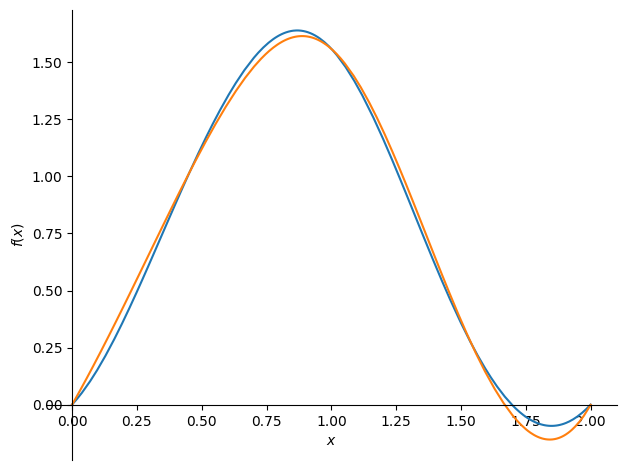

La funcion interpoladora es
 -0.386759045133159*sin(3.14159265358979*x - 3.14159265358979) + 0.77176903930184*cos(3.14159265358979*x - 3.14159265358979) + 0.0174227902879287*cos(6.28318530717959*x - 6.28318530717959) + 0.0065672731483233*cos(9.42477796076938*x - 9.42477796076938) + 0.762008075135118


In [118]:
# Definicion de variables
z = symbols('z')
x = symbols('x')
x0 = [j/5 for j in range(0,10)]
f2 = x**4-3*x**3+2*x**2-tan(x*(x-2))

# Llamado de la funcion
n = 3 # grado 3
TDF(x0,f2,n,0,2)

$b)$ Implementar la interpolación trigonométrica via transformada rápida de Fourier.

In [119]:
def FTF(x,y):
  n = len(x)
  m = int(n/2)
  p = int(np.log(m)/np.log(2))

  # Vector f
  f = [I]*n
  nu = [1,I,(I-1)/np.sqrt(2),(-I-1)/np.sqrt(2)]
  for i in range(0,int(m/2)):
    f[i] = nu[0]*y[4*i]
    f[i+2] = nu[1]*y[4*i+2]
    f[i+4] = nu[2]*y[4*i+1]
    f[i+6] = nu[3]*y[4*i+3]

  # vector e
  e = [I]*n
  for i in range(0,m):
    e[i] = -nu[i]*(f[2*i]+f[2*i+1])
    e[i+4] = f[2*i]-f[2*i+1]

  # Vector d
  d = [I]*n
  for i in range(0,m):
    d[i] = (-1)**i *nu[i%2]*(e[2*i]+e[2*i+1])
    d[i+4] = e[2*i]-e[2*i+1]

  # vector c
  c = [I]*n
  for i in range(0,m):
    c[i] = d[2*i]+d[2*i+1]
    c[i+m] = d[2*i]-d[2*i+1]

  # Simplificar expresiones
  c = [c[i].simplify() for i in range(0,len(c))]

  # Separar coeficientes reales e imaginarios
  a = [re(c[i])/m for i in range(0,len(c))]
  b = [im(c[i])/m for i in range(0,len(c))]

  # Hallar la transformada
  suma3 = sum(a[k]*cos(k*z) + b[k-1]*sin(z*(k-1)) for k in range(1,m))
  S = a[0]/2 + suma3 + a[m]*cos(m*z)/2

  # Grafica de las funciones
  plot1 = plot(S,(z,-np.pi,np.pi),show = False)
  plot1.show()
  return S

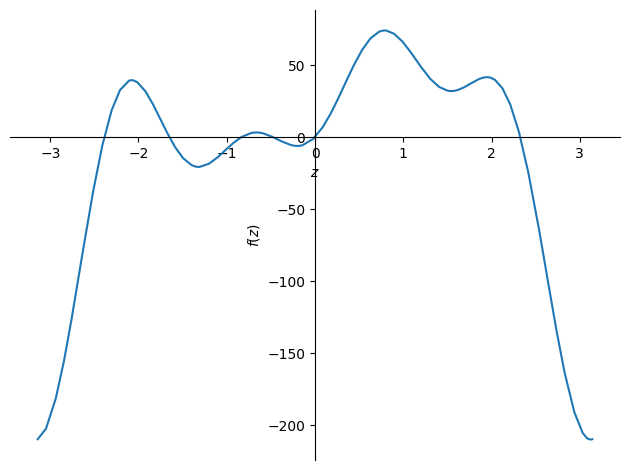

20.2017930806722*sin(z) + 21.9172421336265*sin(2*z) + 65.7819270893168*cos(z) - 58.3335948268113*cos(2*z) + 39.0632927762079*cos(3*z) - 32.7030374453856*cos(4*z) - 13.8085875933279

In [121]:
# Definir los puntos
x02 = [-np.pi + j*np.pi/m for j in range(0,8)]
x = symbols('x')
f2 = x**4-3*x**3+2*x**2-tan(x*(x-2))
y = [f2.subs(x,x02[i]) for i in range(0,len(x02))]

# Llamar a la funcion
FTF(x02,y)